In [1]:
import sys
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
sys.path.append("../gotmtool")
from gotmtool import *

In [2]:
m = Model(name='ADHOC', environ='../gotmtool/.gotm_env.yaml')

In [3]:
for key in m.environ:
    print('{:>15s}: {}'.format(key, m.environ[key]) )

   gotmdir_code: /data1/scratch/qingli/project/adhoc/A2020_ADHOC/gotm/code
   gotmdir_data: /data1/scratch/qingli/project/adhoc/A2020_ADHOC/data
  gotmdir_build: /data1/scratch/qingli/project/adhoc/A2020_ADHOC/gotm/build
    gotmdir_exe: /data1/scratch/qingli/project/adhoc/A2020_ADHOC/gotm/exe
    gotmdir_run: /data1/scratch/qingli/project/adhoc/A2020_ADHOC/gotm/run
 gotmdir_figure: /data1/scratch/qingli/project/adhoc/A2020_ADHOC/gotm/figure
   gotmdir_tool: /data1/scratch/qingli/project/adhoc/A2020_ADHOC/gotmtool


In [4]:
cases = [
    'MSM97-LT',
    'MSM97-ST',
    'MSM97-LTf0',
    'MSM97-STf0',
    ]

dz = [
    '1m',
    # '10m',
    ]

turbmethods = [
    'SMCLT-H15',
    # 'KPP-CVMix',
    'KPPLT-LF17',
    ]

In [5]:
sims = {}
for casename in cases:
    tmp = {}
    for turbmethod in turbmethods:
        for res in dz:
            run_label = '{:s}_{:s}'.format(turbmethod, res)
            run_dir = os.path.join(m.environ['gotmdir_run'], m.name, casename, run_label)
            sim = Simulation(path=run_dir)
            tmp[run_label] = sim
    sims[casename] = tmp

## Time evolution of profiles

In [6]:
def plot_var(sims, varname, tag):
    nsims = len(sims)
    fig, axarr = plt.subplots(nsims, sharex='col')
    fig.set_size_inches([6,1+nsims*3])
    for i, sname in enumerate(sims):
        ax = axarr[i]
        ds = sims[sname].load_data().data_vars[varname].plot(ax=ax)
        ax.set_title('{:s}_{:s}'.format(tag, sname))
        ax.set_xlabel('')

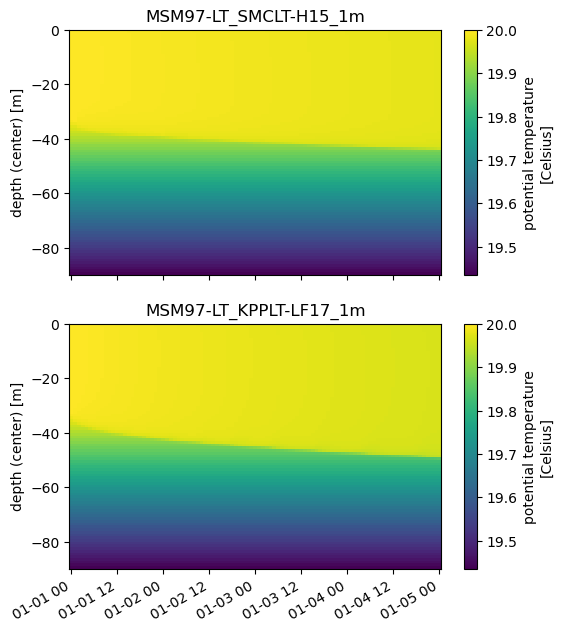

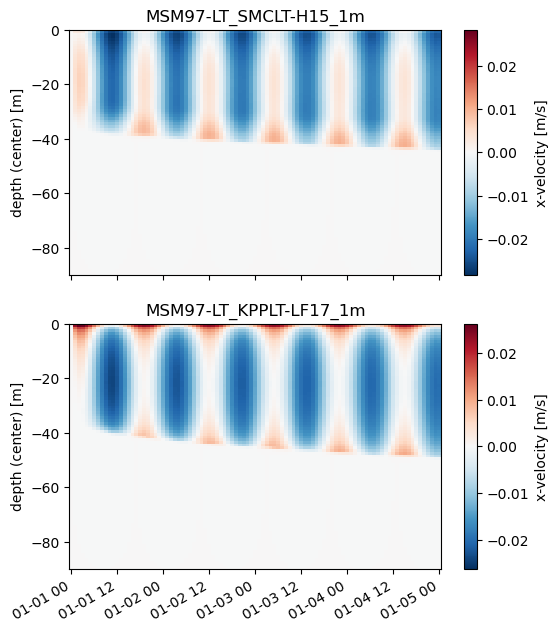

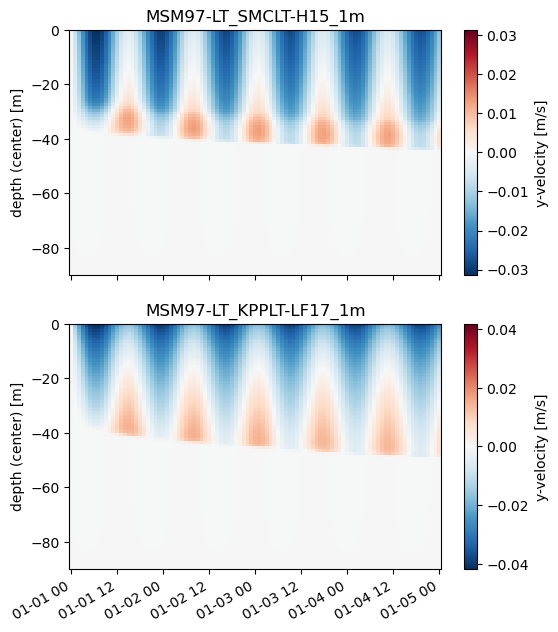

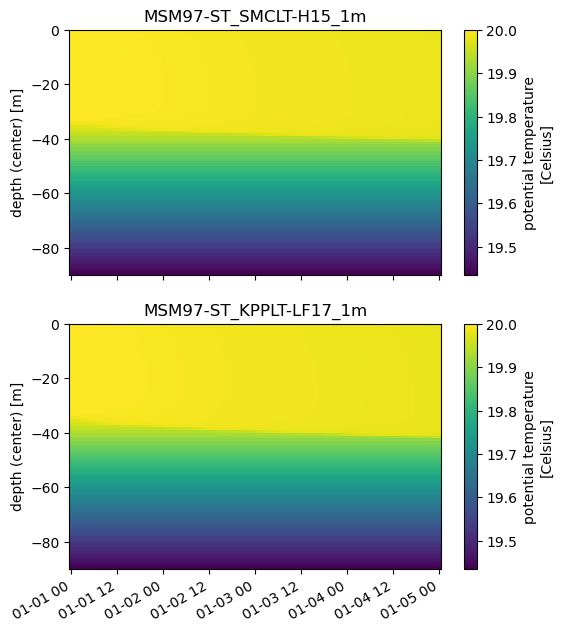

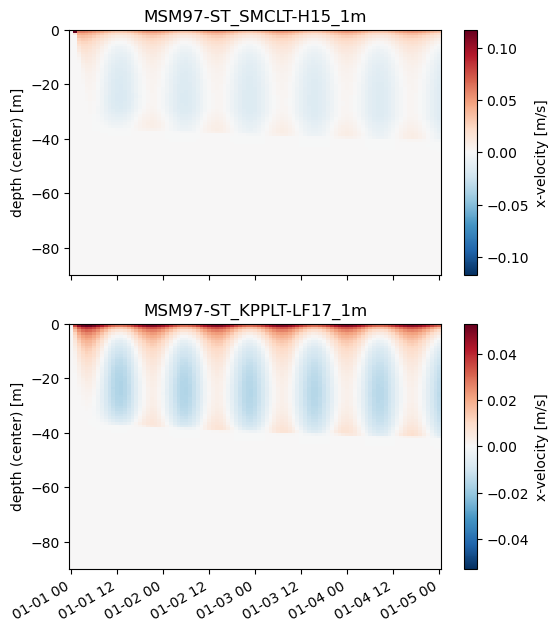

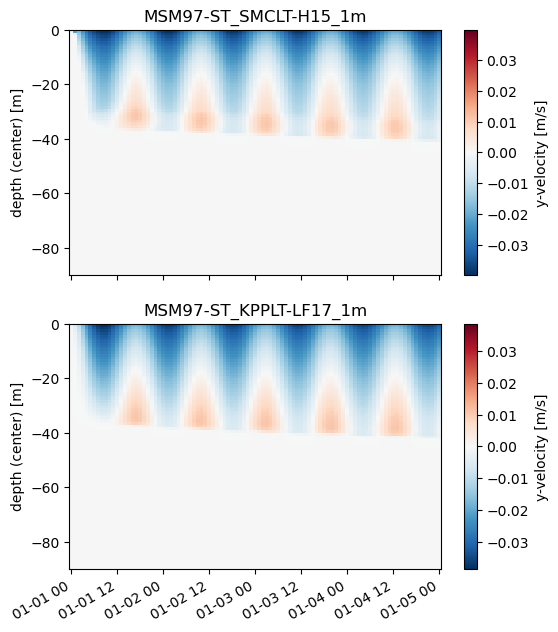

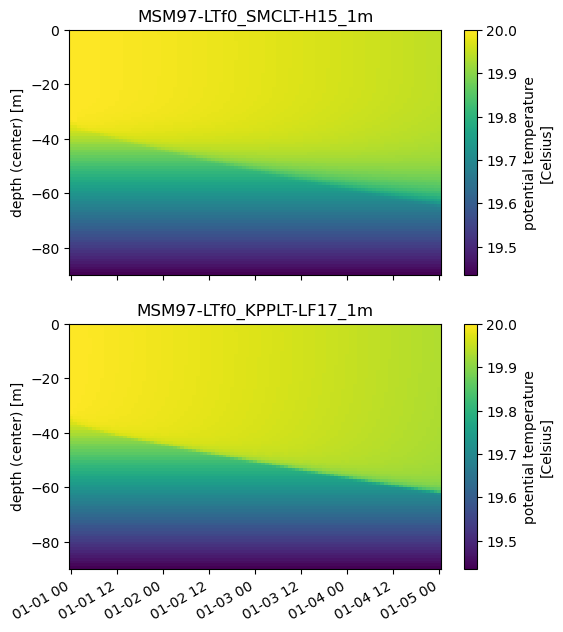

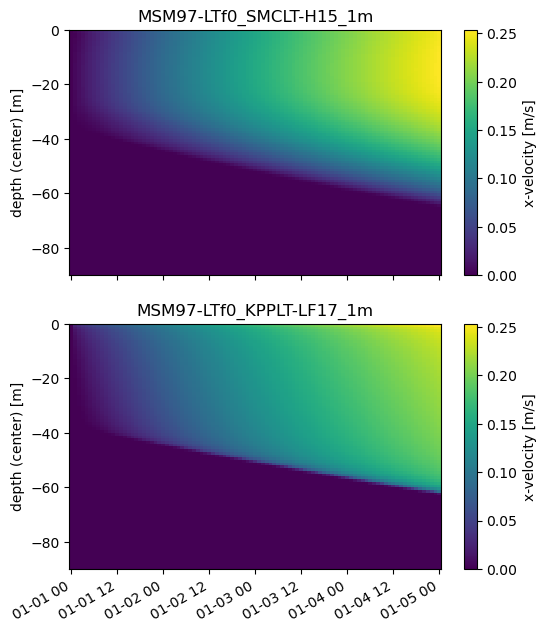

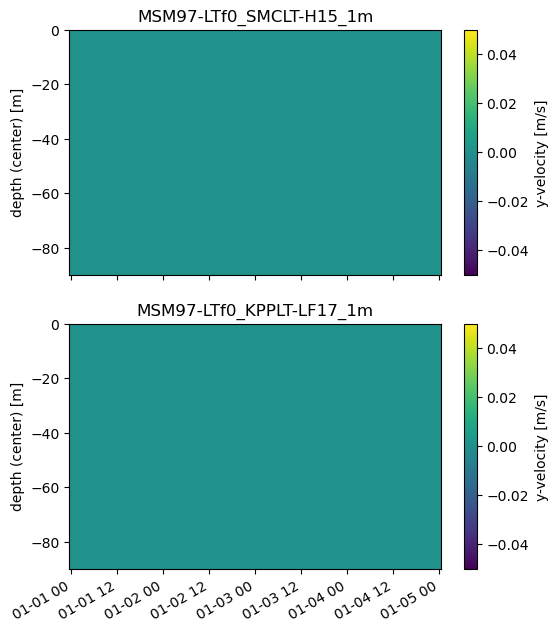

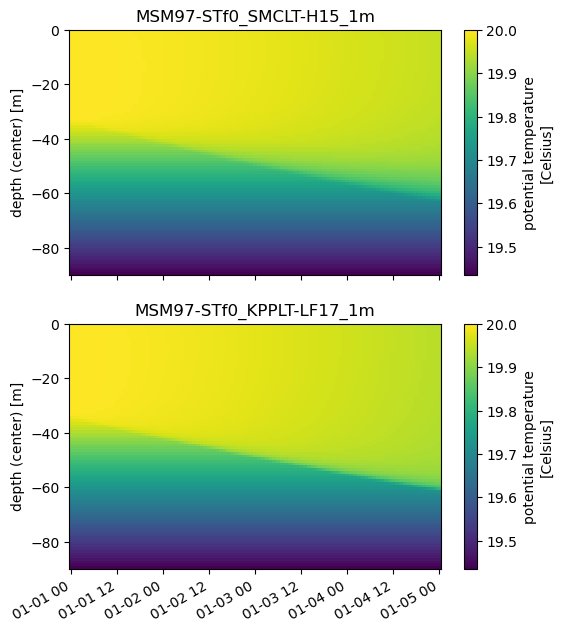

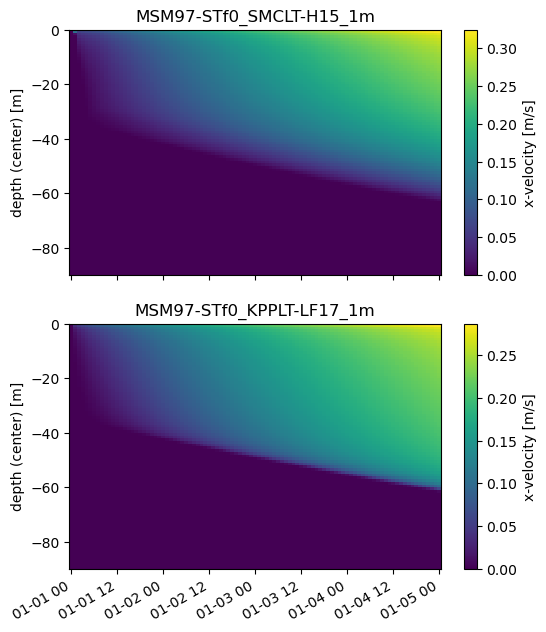

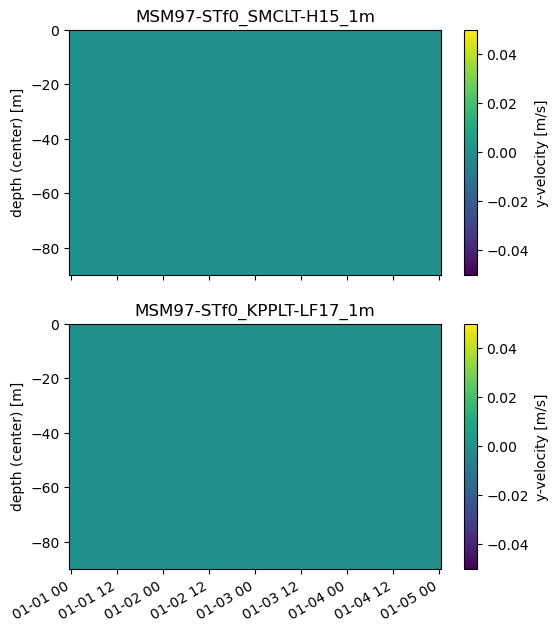

In [7]:
for casename in sims:
    for varname in ['temp', 'u', 'v']:
        plot_var(sims[casename], varname, casename)

## Mean profiles averaged over an inertial period

In [8]:
# compute the inertial period
lat = 45
f = 4*np.pi/86400*np.sin(np.deg2rad(lat))
Tf = 2*np.pi/f 
print(Tf/3600)
avgts_str = '2000-01-03T00:00:00'
dtformat = '%Y-%m-%dT%H:%M:%S'
avgts = datetime.strptime(avgts_str, dtformat)
avgte = avgts + timedelta(seconds=Tf)
timeslice = slice(avgts, avgte)

16.97056274847714


In [9]:
def plot_var_mprof(sims, varname, timeslice, tag):
    fig = plt.figure(figsize=[6,4])
    for sname in sims:
        avgpfl = sims[sname].load_data().data_vars[varname].sel(time=timeslice).mean(dim='time')
        avgpfl.plot(y='z',label=sname)
    plt.title('{:s}'.format(tag))
    plt.legend()

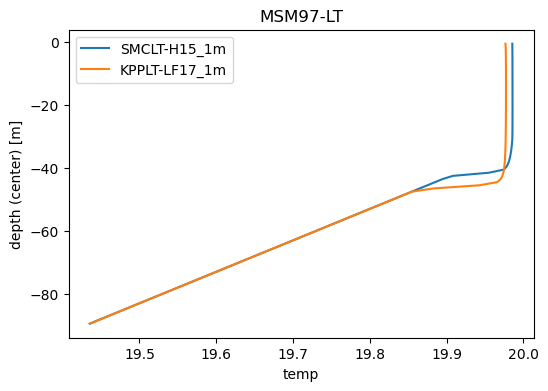

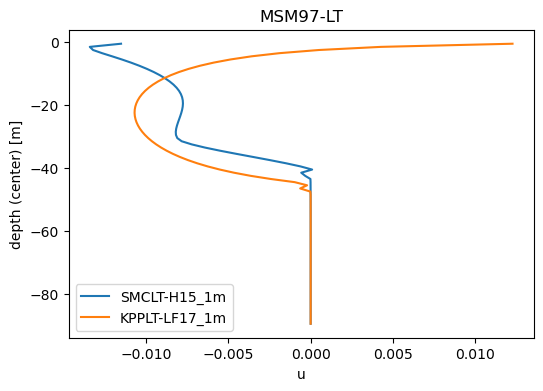

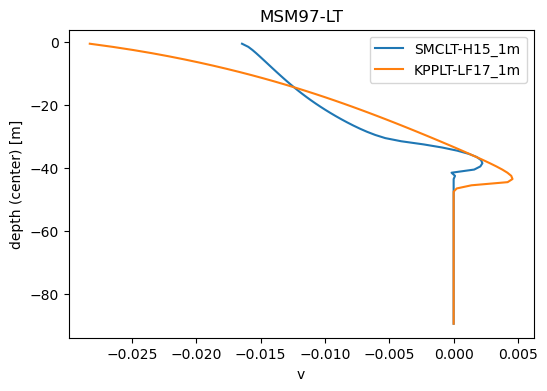

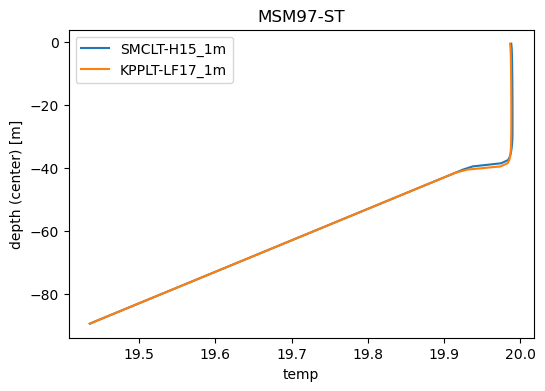

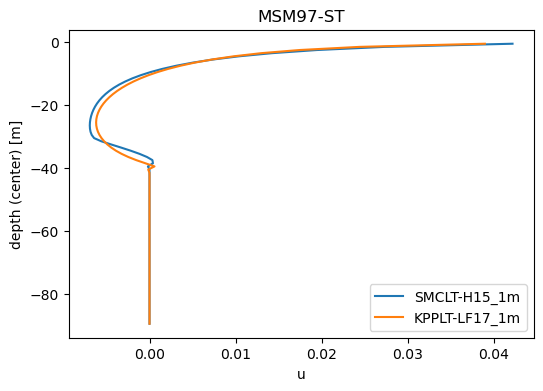

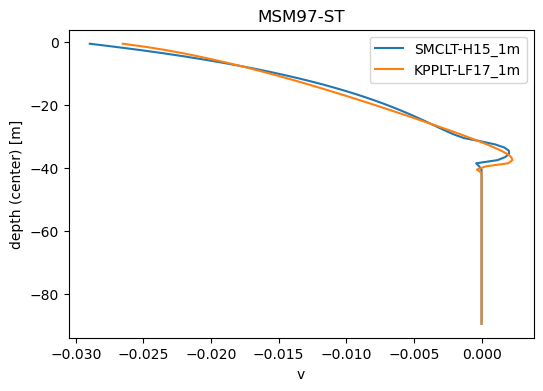

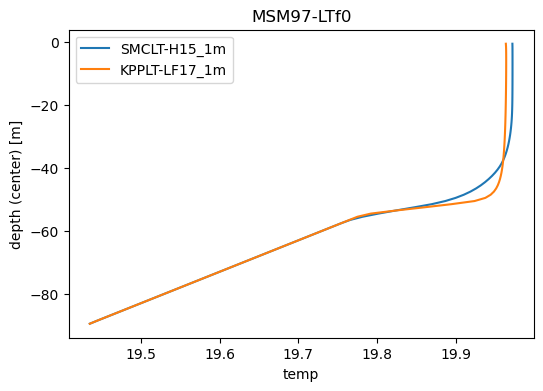

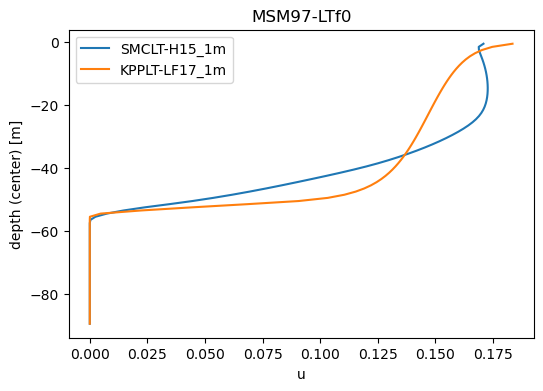

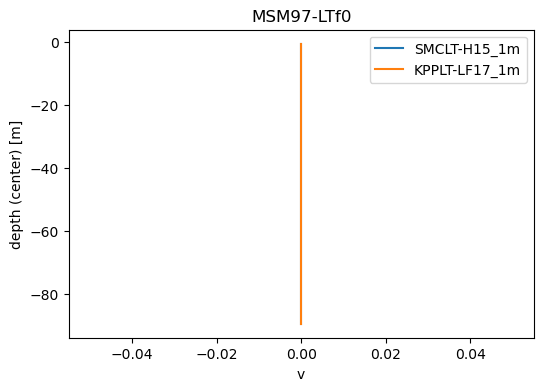

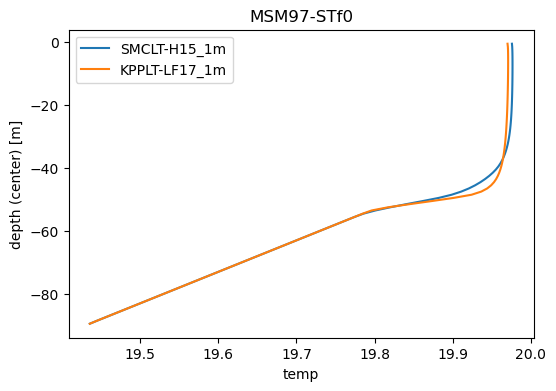

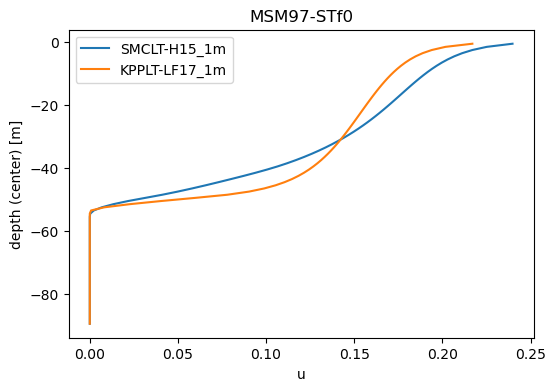

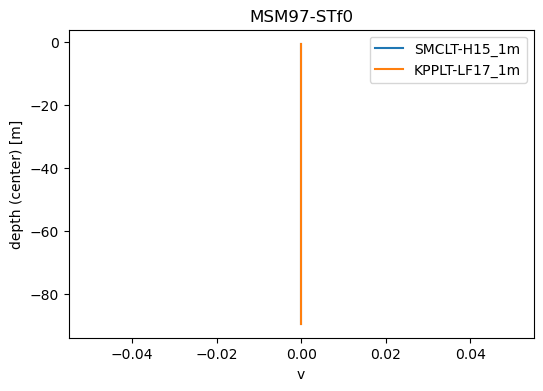

In [10]:
for casename in sims:
    for varname in ['temp', 'u', 'v']:
        plot_var_mprof(sims[casename], varname, timeslice, casename)